<a href="https://colab.research.google.com/github/tonyjosephsebastians/100DaysMLCode/blob/main/Heart_Disease_Prediction_LOgistic_regression_and_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART** **DISEASE** **PREDICTION**

In [ ]:
#Importing libraries
import sklearn
import numpy as np
import pandas as pd

import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

# **Data preprocessing**

**a)Load the data set into a data**

In [ ]:
#importing dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data')


In [ ]:
#view first 5 rows of the dataset
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
#providing column names
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df.columns =cols
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
#check shape of the datset i.e number of rows and columns
df.shape

(302, 14)

**b) Checking missing values in the dataset**

In [ ]:
#check for null column values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [ ]:
# Checking for Null Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Handling missing values**

In [ ]:
#checking missing values in ca field
df.ca

0      3.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
297    0.0
298    2.0
299    1.0
300    1.0
301      ?
Name: ca, Length: 302, dtype: object

In [ ]:
# finding out the values with "?"
list1 =[] 
for i in range(0,14):
  if len(df[((df.iloc[:,i] == '?'))].index) > 0:
    list1.append(df[((df.iloc[:,i] == '?'))].index)
list1

[Int64Index([165, 191, 286, 301], dtype='int64'),
 Int64Index([86, 265], dtype='int64')]

In [ ]:
#Set all the target values into 1 if its greater than equal to 1 otherwise set as 0.
df['target'].values[df['target'].values >=1] = 1

In [ ]:
#Droping the values
for i in range(len(list1)):
  df = df.drop(list1[i])

In [ ]:
# converting the object to float
df["ca"] = pd.to_numeric(df["ca"], downcast="float")
df["thal"] = pd.to_numeric(df["thal"], downcast="float")

**Perform normalization of the selected features**

In [ ]:
#Binning age','trestbps','chol','thalach' into different small age groups
from sklearn.preprocessing import KBinsDiscretizer

colName = ['age','trestbps','chol','thalach']
feature = df[colName]
bin = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
bin.fit(feature.values)
feature = bin.transform(feature.values)
df[colName] = feature

The following are the column names of the datset
1.)Age: displays the age of the individual.

2.)Sex: displays the gender of the individual using the following format :
1 = male
0 = female

3.)Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
1 = typical angina
2 = atypical angina
3 = non — anginal pain
4 = asymptotic


4.)Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)

5.)Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6.)Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)

7.)Resting ECG : displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy

8.)Max heart rate achieved : displays the max heart rate achieved by an individual.
Exercise induced angina :
1 = yes
0 = no

9.)ST depression induced by exercise relative to rest: displays the value which is an integer or float.

10.)Peak exercise ST segment :
1 = upsloping
2 = flat
3 = downsloping

11.)Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

12.)Thal : displays the thalassemia :
3 = normal
6 = fixed defect
7 = reversible defect

13.)Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
0 = absence
1, 2, 3, 4 = present.  


The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [ ]:
#get number of people with heart disease and with no heart disease,
#grouping all true values and ones values
df.groupby('target').size()

target
0    159
1    137
dtype: int64

# **Data visualization**

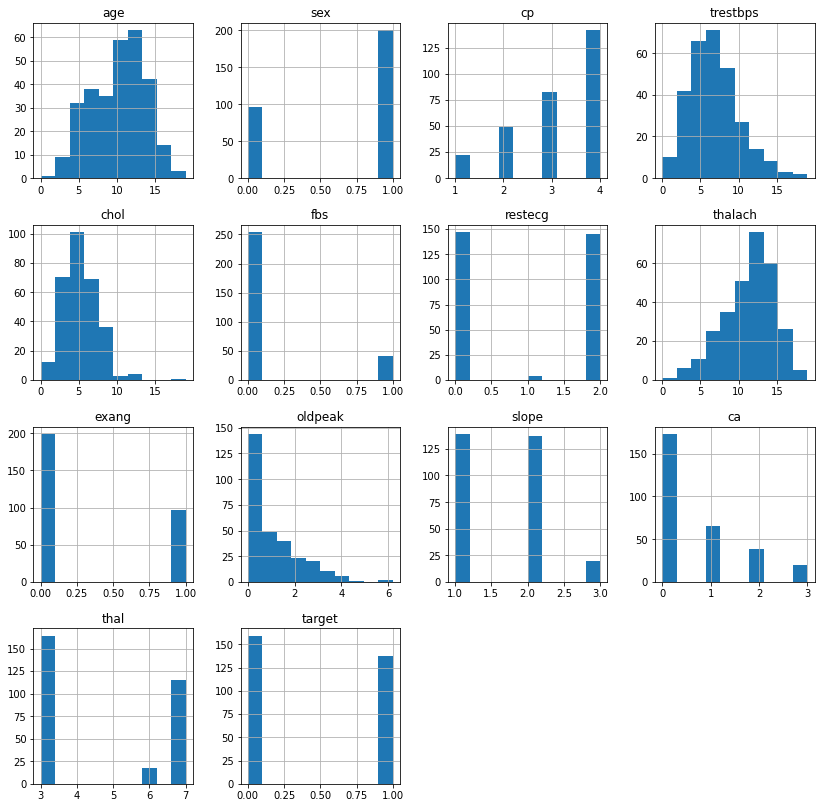

In [ ]:

#Visualization using matplotlib
df.hist(figsize=(14,14),)
plt.show()

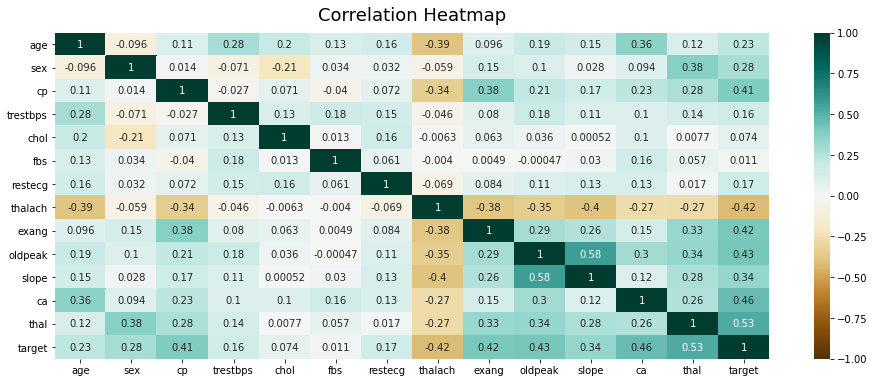

In [ ]:
#Plotting heatmap for finding correlation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


In [ ]:
#About 70% of male are affected by heart dsease as compared to women which is 45%

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



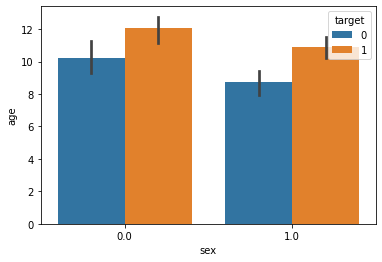

In [ ]:
sns.barplot(df['sex'],df['age'],hue=df['target'])

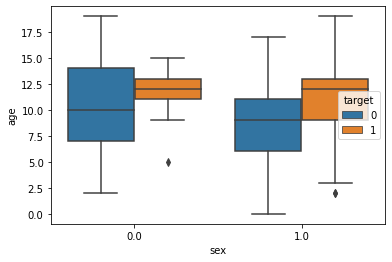

In [ ]:
#Box Plot
sns.boxplot(x='sex',y='age',hue='target',data=df)

As we can see women around age of 56-57 have heart disease
and men around age of 52-53 have heart disease

store values in x and y loc is used to call df values by names we will store all features in x and target in y
We want all the rows and columns ending thal

**Use a measure of central tendency for each feature**

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,10.189189,0.675676,3.165541,6.533784,5.043919,0.141892,0.993243,11.486486,0.327703,1.051351,1.597973,0.679054,4.726351,0.462838
std,3.740482,0.468915,0.958262,3.339371,2.381019,0.349530,0.994879,3.487482,0.470171,1.165841,0.613848,0.939727,1.940500,0.499461
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,7.000000,0.000000,3.000000,4.000000,3.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,11.000000,1.000000,3.000000,6.000000,5.000000,0.000000,1.000000,12.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,13.000000,1.000000,4.000000,8.000000,6.000000,0.000000,2.000000,14.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,19.000000,1.000000,4.000000,19.000000,19.000000,1.000000,2.000000,19.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
#Median
df.median()

age         11.0
sex          1.0
cp           3.0
trestbps     6.0
chol         5.0
fbs          0.0
restecg      1.0
thalach     12.0
exang        0.0
oldpeak      0.8
slope        2.0
ca           0.0
thal         3.0
target       0.0
dtype: float64

In [ ]:
#Mode
df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,12.0,1.0,4.0,6.0,3.0,0.0,0.0,13.0,0.0,0.0,1.0,0.0,3.0,0


**Show the dispersion and IQR of features**

In [ ]:
#IQR
def find_outlier(data_column):

    sorted(data_column)
    q1,q3 = np.percentile(data_column,[25,75])
    IQR = q3-q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR

    return lb,ub

In [ ]:
#Removing outliers
for i in df.keys():
  Lower_b,Upper_b = find_outlier(df[i])
  print(f"The outliers of {i} feature is{Lower_b} , {Upper_b}")
  df.drop(df[(df[i] < Lower_b )| (df[i] > Upper_b)].index,inplace=True)

The outliers of age feature is-2.0 , 22.0
The outliers of sex feature is-1.5 , 2.5
The outliers of cp feature is1.5 , 5.5
The outliers of trestbps feature is-2.0 , 14.0
The outliers of chol feature is-1.5 , 10.5
The outliers of fbs feature is0.0 , 0.0
The outliers of restecg feature is-3.0 , 5.0
The outliers of thalach feature is1.5 , 21.5
The outliers of exang feature is-1.5 , 2.5
The outliers of oldpeak feature is-2.4000000000000004 , 4.0
The outliers of slope feature is-0.5 , 3.5
The outliers of ca feature is-1.5 , 2.5
The outliers of thal feature is-3.0 , 13.0
The outliers of target feature is-1.5 , 2.5


In [ ]:
x,y = df.loc[:,:'thal'],df['target']

**store values in x and y loc is used to call df values by names we will store all features in x and target in y We want all the rows and columns ending thal**

Now, let us check and y

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,15.0,1.0,4.0,4.0,4.0,0.0,2.0,8.0,1.0,2.6,2.0,2.0,7.0
2,3.0,1.0,3.0,6.0,5.0,0.0,0.0,17.0,0.0,3.5,3.0,0.0,3.0
3,5.0,0.0,2.0,6.0,3.0,0.0,2.0,15.0,0.0,1.4,1.0,0.0,3.0
4,11.0,1.0,2.0,4.0,5.0,0.0,0.0,16.0,0.0,0.8,1.0,0.0,3.0
5,13.0,0.0,4.0,8.0,6.0,0.0,2.0,13.0,0.0,3.6,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,14.0,0.0,4.0,5.0,3.0,0.0,0.0,9.0,1.0,0.0,2.0,0.0,3.0
294,5.0,1.0,2.0,4.0,1.0,0.0,0.0,16.0,0.0,0.0,1.0,0.0,3.0
296,11.0,0.0,4.0,8.0,5.0,0.0,0.0,7.0,1.0,0.2,2.0,0.0,7.0
299,11.0,1.0,4.0,6.0,0.0,0.0,0.0,6.0,1.0,1.2,2.0,1.0,7.0


In [ ]:
y

1      1
2      0
3      0
4      0
5      1
      ..
293    1
294    0
296    1
299    1
300    1
Name: target, Length: 212, dtype: int64

**Now,split data for training**

In [ ]:
x.shape

(212, 13)

In [ ]:
y.size

212

In [ ]:
x.shape

(212, 13)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = (train_test_split(x,y,random_state=20,test_size=0.3,shuffle=True))

**Let us check difference between x and z train data as we have split the data**

In [ ]:
x.shape

(212, 13)

In [ ]:
x_train.shape

(148, 13)

In [ ]:
y.size

212

y_train.size

In [ ]:
y_test.size

64

# **Supervised learning**

**LOGISTIC REGRESSION**

This is model works based on probabilty.

 The logistic regression model can be derive from 
 linear regression model by applying sigmiod function.

y  = b0 + b1*x - Linear model

p = 1/(1+e^-y) - Sigmoid function


applying  p to y

ln(p/1-p) = b0 + b1*x - (Logistical regression model)

In [ ]:
#feature scailing 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Using train set to train the model

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 0)
log_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**confusion matrix**

In [ ]:

#predicting
log_pred = log_model.predict(x_test)
#Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, log_pred)
print(cm)
log_accurracy = accuracy_score(y_test, log_pred)

[[37  2]
 [ 5 20]]


In [ ]:
#Classification Report
print(classification_report(y_test, log_pred))
log_accurracy

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.91      0.80      0.85        25

    accuracy                           0.89        64
   macro avg       0.90      0.87      0.88        64
weighted avg       0.89      0.89      0.89        64



0.890625

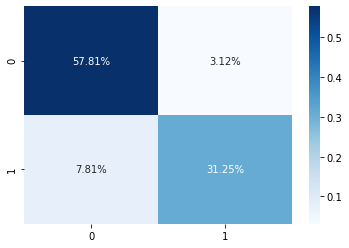

Accuracy is:  89.0625


In [ ]:
cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,log_pred)
print('Accuracy is: ',ac*100)

# **Unsupervised Learning**

**K Means Clustering**

In [ ]:
#Inputting only two features. age chol

In [ ]:
data = df[['age','chol']]

In [ ]:
data.describe

<bound method NDFrame.describe of       age  chol
1    15.0   4.0
2     3.0   5.0
3     5.0   3.0
4    11.0   5.0
5    13.0   6.0
..    ...   ...
293  14.0   3.0
294   5.0   1.0
296  11.0   5.0
299  11.0   0.0
300  11.0   5.0

[212 rows x 2 columns]>

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_x = sc.fit_transform(data)

**K-means algorithm to find out cluster from the data**

Text(0.5, 1.0, 'Visualization of clustered data')

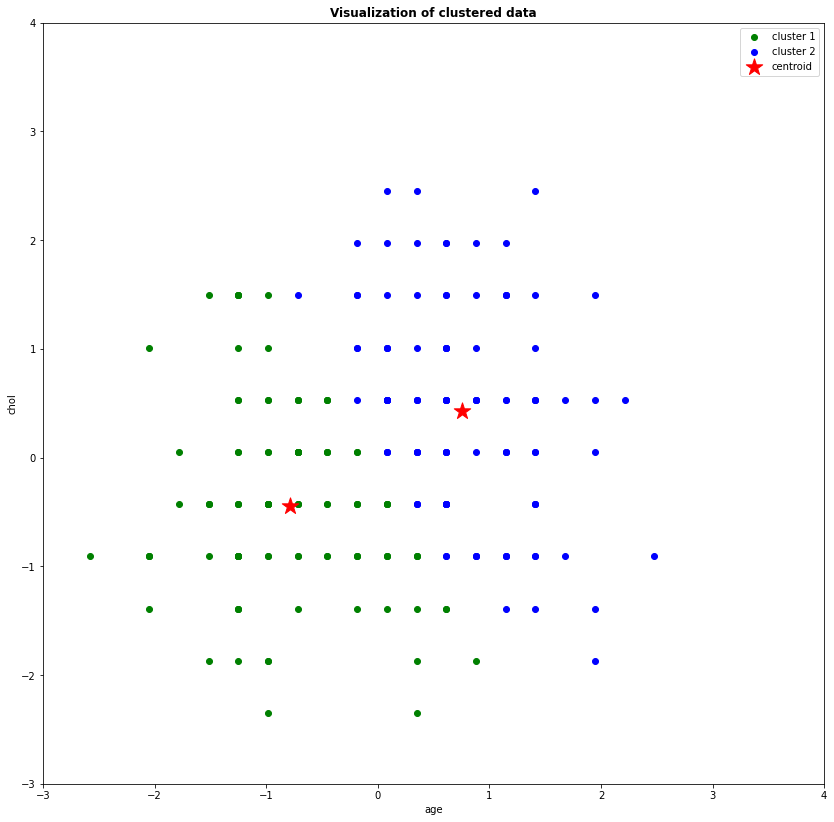

In [ ]:
#K=2
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, max_iter=100, random_state = 42)
km.fit(data_x)
centroids = km.cluster_centers_
# labels_ are equivalent to calling fit(x) then predict
labels_ = km.predict(data_x)
labels_
# Plot the clustered data
fig, ax = plt.subplots(figsize=(14, 14))
plt.scatter(data_x[labels_ == 0, 0], data_x[labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(data_x[labels_ == 1, 0], data_x[labels_ == 1, 1],
            c='blue', label='cluster 2')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Visualization of clustered data', fontweight='bold')

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
km.cluster_centers_

array([[-0.78617593, -0.44168289],
       [ 0.7570583 ,  0.42532426]])

In [ ]:
pred = km.predict(data_x)
pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

**Different number of clusters to compare the results**


<function matplotlib.pyplot.show>

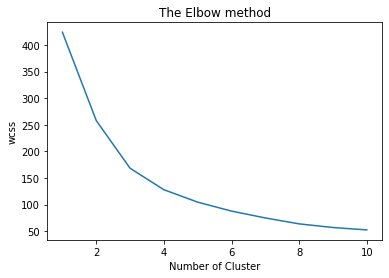

In [ ]:
#Elbow Method to find optimum clusters
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show

Increasing the number of cluster K=3

In [ ]:
k_means_clus3 = KMeans(n_clusters=3,init = 'k-means++',random_state=0)

In [ ]:
pred_clust_3 = k_means_clus3.fit_predict(data_x)

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_x,pred_clust_3)
print(f"The silhouette score for {k_means_clus3.n_clusters} cluster is {score}")

The silhouette score for 3 cluster is 0.3736973411779142


Text(0.5, 1.0, 'Visualization of clustered data')

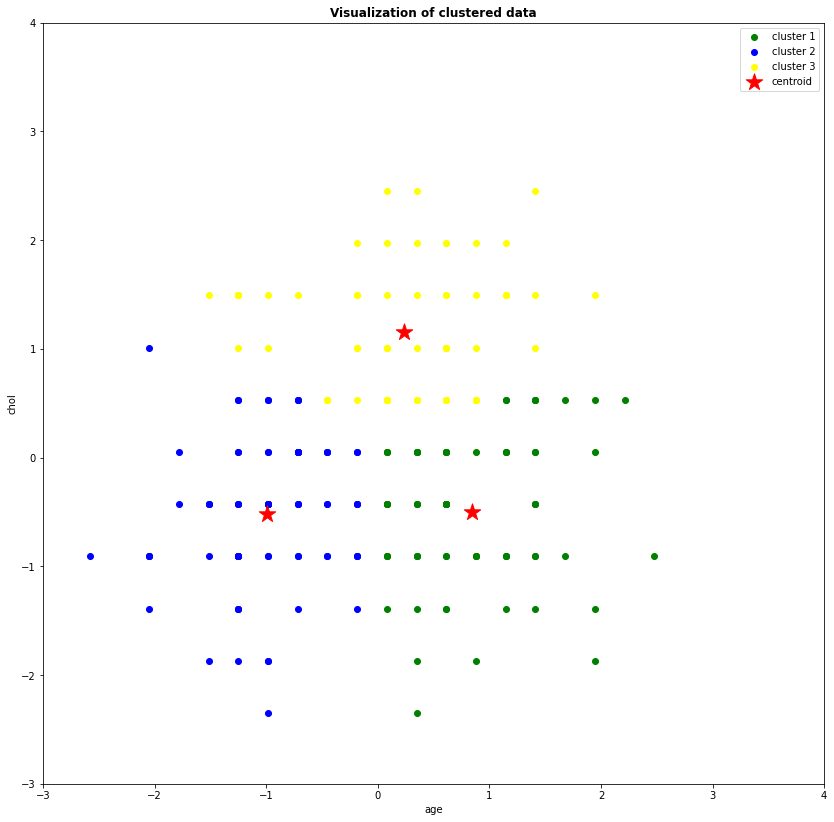

In [ ]:
centroids = k_means_clus3.cluster_centers_
# labels_ are equivalent to calling fit(x) then predict
labels_ = k_means_clus3.predict(data_x)
labels_
# Plot the clustered data
fig, ax = plt.subplots(figsize=(14, 14))
plt.scatter(data_x[labels_ == 0, 0], data_x[labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(data_x[labels_ == 1, 0], data_x[labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(data_x[labels_ == 2, 0], data_x[labels_ == 2, 1],
            c='yellow', label='cluster 3')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Visualization of clustered data', fontweight='bold')

In [ ]:
k_means_clust4 = KMeans(n_clusters=4,init = 'k-means++',random_state=0)
pred_clust_4 = k_means_clust4.fit_predict(data_x)
score = silhouette_score(data_x,pred_clust_4)
print(f"The silhouette score for {k_means_clust4.n_clusters} cluster is {score}")

The silhouette score for 4 cluster is 0.3608995461408319


In [ ]:
#Plotting the datapoints with cluster 4

Text(0.5, 1.0, 'Visualization of clustered data')

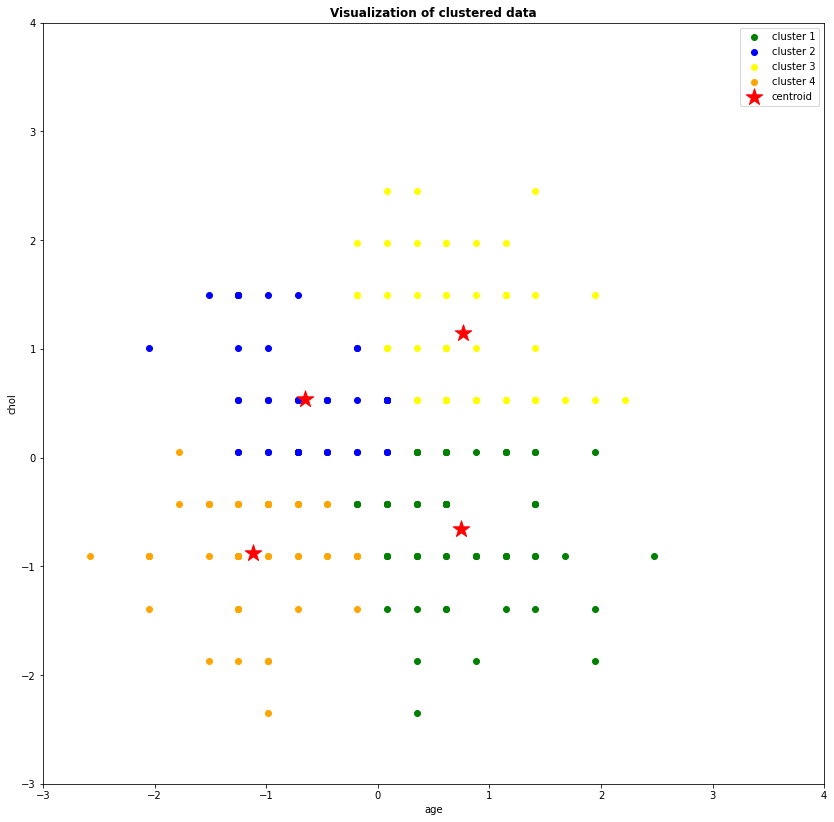

In [ ]:
centroids = k_means_clust4.cluster_centers_
# labels_ are equivalent to calling fit(x) then predict
labels_ = k_means_clust4.predict(data_x)
labels_
# Plot the clustered data
fig, ax = plt.subplots(figsize=(14, 14))
plt.scatter(data_x[labels_ == 0, 0], data_x[labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(data_x[labels_ == 1, 0], data_x[labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(data_x[labels_ == 2, 0], data_x[labels_ == 2, 1],
            c='yellow', label='cluster 3')
plt.scatter(data_x[labels_ == 3, 0], data_x[labels_ == 3, 1],
            c='orange', label='cluster 4')


plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Visualization of clustered data', fontweight='bold')